Quadrative Hamiltonians and Slater Determinants:

In [3]:
import numpy as np
from qiskit_nature.second_q.hamiltonians import QuadraticHamiltonian

# create Hamiltonian
hermitian_part = np.array(
    [
        [1.0, 2.0, 0.0, 0.0],
        [2.0, 1.0, 2.0, 0.0],
        [0.0, 2.0, 1.0, 2.0],
        [0.0, 0.0, 2.0, 1.0],
    ]
)
antisymmetric_part = np.array(
    [
        [0.0, 3.0, 0.0, 0.0],
        [-3.0, 0.0, 3.0, 0.0],
        [0.0, -3.0, 0.0, 3.0],
        [0.0, 0.0, -3.0, 0.0],
    ]
)
constant = 4.0

hamiltonian = QuadraticHamiltonian(
    hermitian_part=hermitian_part,
    antisymmetric_part=antisymmetric_part,
    constant=constant,
)

# convert it to a FermionicOp and print it
hamiltonian_ferm = hamiltonian.second_q_op()
print(hamiltonian_ferm)

Fermionic Operator
number spin orbitals=4, number terms=23
  4.0
+ 1.0 * ( +_0 -_0 )
+ 2.0 * ( +_0 -_1 )
+ 2.0 * ( +_1 -_0 )
+ 1.0 * ( +_1 -_1 )
+ 2.0 * ( +_1 -_2 )
+ 2.0 * ( +_2 -_1 )
+ 1.0 * ( +_2 -_2 )
+ 2.0 * ( +_2 -_3 )
+ 2.0 * ( +_3 -_2 )
+ 1.0 * ( +_3 -_3 )
+ 1.5 * ( +_0 +_1 )
+ -1.5 * ( +_1 +_0 )
+ 1.5 * ( +_1 +_2 )
+ -1.5 * ( +_2 +_1 )
+ 1.5 * ( +_2 +_3 )
+ -1.5 * ( +_3 +_2 )
+ -1.5 * ( -_0 -_1 )
+ 1.5 * ( -_1 -_0 )
+ -1.5 * ( -_1 -_2 )
+ 1.5 * ( -_2 -_1 )
+ -1.5 * ( -_2 -_3 )
+ 1.5 * ( -_3 -_2 )


Diagonalization and State Preparation:

In [4]:
# get the transformation matrix W and orbital energies {epsilon_j}
(
    transformation_matrix,
    orbital_energies,
    transformed_constant,
) = hamiltonian.diagonalizing_bogoliubov_transform()

print(f"Shape of matrix W: {transformation_matrix.shape}")
print(f"Orbital energies: {orbital_energies}")
print(f"Transformed constant: {transformed_constant}")

Shape of matrix W: (4, 8)
Orbital energies: [0.29826763 4.38883678 5.5513683  5.64193745]
Transformed constant: -1.940205075849283


Supremely Important (FermionicGaussianStates):

Eigenvalue: 3.909430851761578


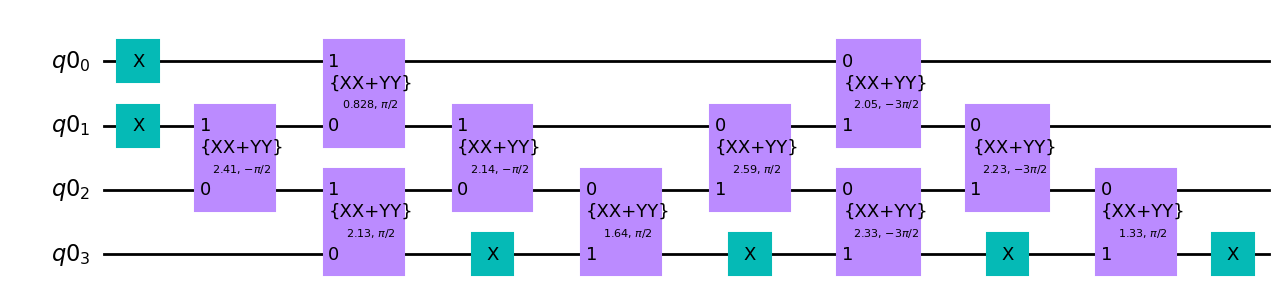

In [5]:
# Extraordinarily Important (You will be using this within Product Formulas):

from qiskit_nature.second_q.circuit.library import FermionicGaussianState

occupied_orbitals = (0, 2)
eig = np.sum(orbital_energies[list(occupied_orbitals)]) + transformed_constant
print(f"Eigenvalue: {eig}")

circuit = FermionicGaussianState(transformation_matrix, occupied_orbitals=occupied_orbitals)
circuit.draw("mpl")

In [6]:
from qiskit.quantum_info import Statevector
from qiskit_nature.second_q.mappers import JordanWignerMapper

# simulate the circuit to get the final state
state = np.array(Statevector(circuit))

# convert the Hamiltonian to a matrix
hamiltonian_jw = JordanWignerMapper().map(hamiltonian_ferm).to_matrix()

# check that the state is an eigenvector with the expected eigenvalue
np.testing.assert_allclose(hamiltonian_jw @ state, eig * state, atol=1e-8)

/home/ssr/.local/lib/python3.8/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)


Slater Determinants:

In [7]:
# create Hamiltonian
hermitian_part = np.array(
    [
        [1.0, 2.0, 0.0, 0.0],
        [2.0, 1.0, 2.0, 0.0],
        [0.0, 2.0, 1.0, 2.0],
        [0.0, 0.0, 2.0, 1.0],
    ]
)
constant = 4.0

hamiltonian = QuadraticHamiltonian(
    hermitian_part=hermitian_part,
    constant=constant,
)

print(f"Hamiltonian conserves particle number: {hamiltonian.conserves_particle_number()}")

Hamiltonian conserves particle number: True


In [8]:
# get the transformation matrix W and orbital energies {epsilon_j}
(
    transformation_matrix,
    orbital_energies,
    transformed_constant,
) = hamiltonian.diagonalizing_bogoliubov_transform()

print(f"Shape of matrix W: {transformation_matrix.shape}")
print(f"Orbital energies: {orbital_energies}")
print(f"Transformed constant: {transformed_constant}")

Shape of matrix W: (4, 4)
Orbital energies: [-2.23606798 -0.23606798  2.23606798  4.23606798]
Transformed constant: 4.0


Eigenvalue: 4.000000000000001


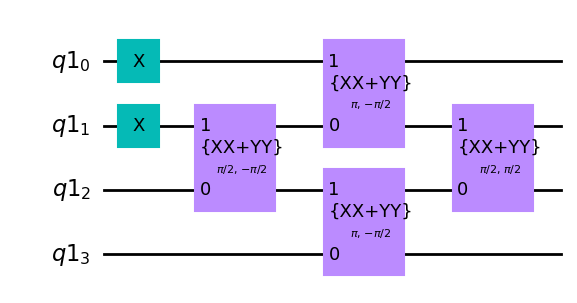

In [9]:
from qiskit_nature.second_q.circuit.library import SlaterDeterminant

occupied_orbitals = (0, 2)
eig = np.sum(orbital_energies[list(occupied_orbitals)]) + transformed_constant
print(f"Eigenvalue: {eig}")

circuit = SlaterDeterminant(transformation_matrix[list(occupied_orbitals)])
circuit.draw("mpl")

Time Evolution:

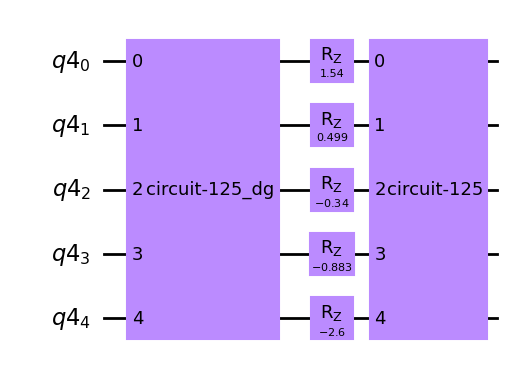

In [11]:
from qiskit_nature.second_q.circuit.library import BogoliubovTransform
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import random_hermitian, random_statevector, state_fidelity
from scipy.linalg import expm

# create Hamiltonian
n_modes = 5
hermitian_part = np.array(random_hermitian(n_modes))
hamiltonian = QuadraticHamiltonian(hermitian_part=hermitian_part)

# diagonalize Hamiltonian
(
    transformation_matrix,
    orbital_energies,
    _,
) = hamiltonian.diagonalizing_bogoliubov_transform()

# set simulation time and construct time evolution circuit
time = 1.0
register = QuantumRegister(n_modes)
circuit = QuantumCircuit(register)
bog_circuit = BogoliubovTransform(transformation_matrix)
# change to the diagonal basis of the Hamiltonian
circuit.append(bog_circuit.inverse(), register)
# perform time evolution by applying z rotations
for q, energy in zip(register, orbital_energies):
    circuit.rz(-energy * time, q)
# change back to the original basis
circuit.append(bog_circuit, register)

# simulate the circuit
initial_state = random_statevector(2**n_modes)
final_state = initial_state.evolve(circuit)

# compute the correct state by direct exponentiation
hamiltonian_jw = JordanWignerMapper().map(hamiltonian.second_q_op()).to_matrix()
exact_evolution_op = expm(-1j * time * hamiltonian_jw)
expected_state = exact_evolution_op @ np.array(initial_state)

# check that the simulated state is correct
fidelity = state_fidelity(final_state, expected_state)
np.testing.assert_allclose(fidelity, 1.0, atol=1e-8)

circuit.draw('mpl')